In [3]:

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

import tensorflow as tf
import tensorflow_hub as hub
import seaborn as sns
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import RandomOverSampler

## Feedforward neural network example

In [6]:
data = pd.read_csv("diabetes.csv")


In [7]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [8]:
data.shape

(768, 9)

In [9]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
len(data[data['Outcome'] == 1]), len(data[data['Outcome']==0])

(268, 500)

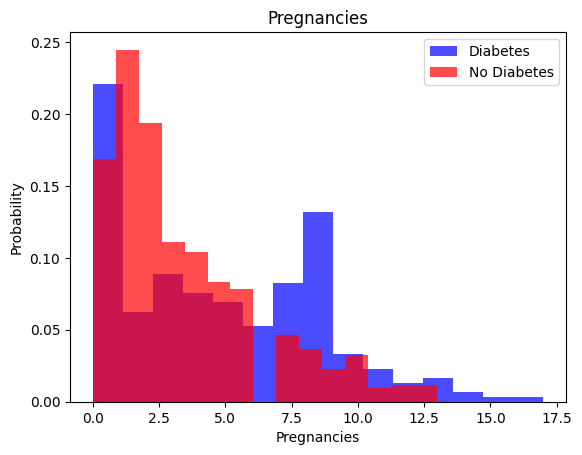

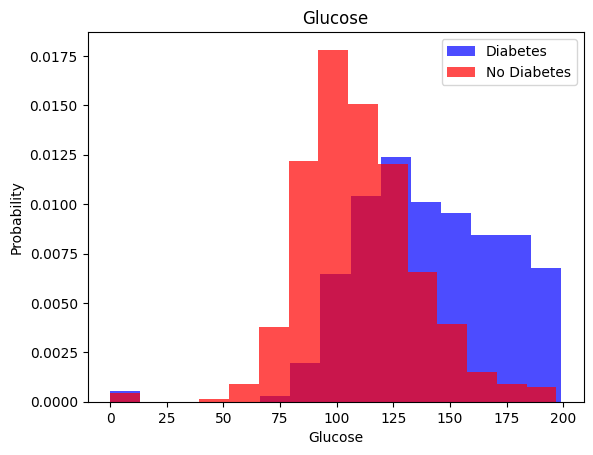

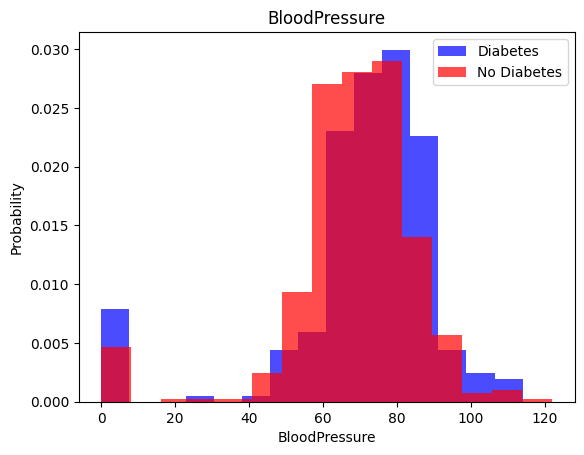

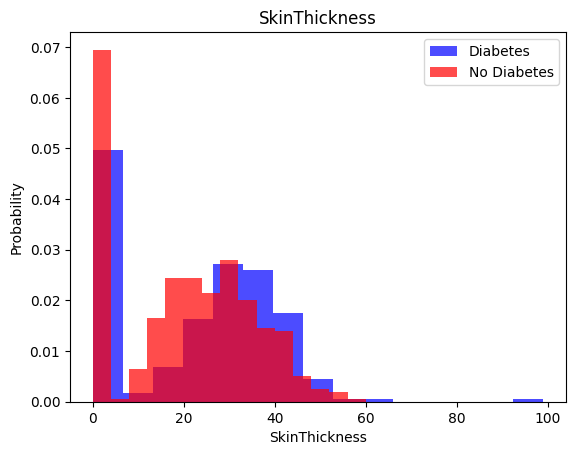

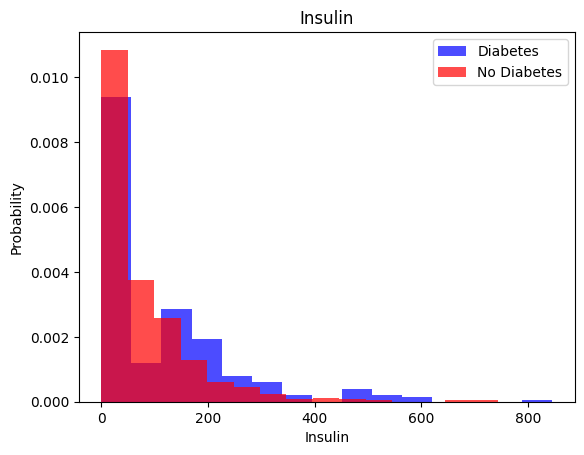

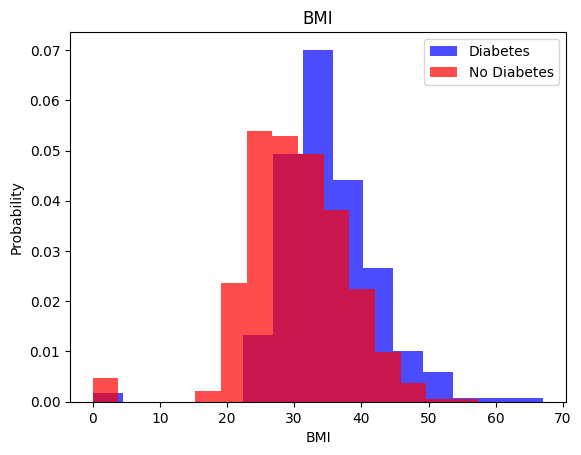

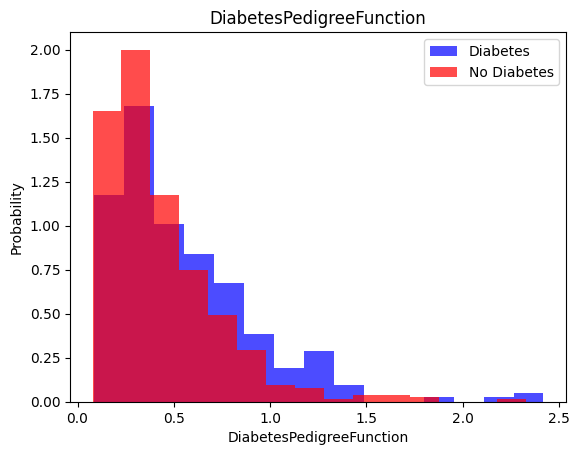

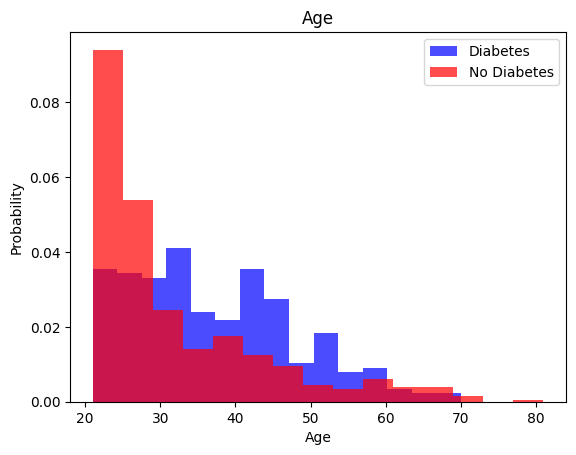

In [11]:
for i in range(len(data.columns[:-1])):
  label = data.columns[i]
  plt.hist(data[data['Outcome']==1][label], color = 'b', alpha=0.7, label='Diabetes', density = True, bins = 15)
  plt.hist(data[data['Outcome']==0][label], color = 'r', alpha = 0.7, label='No Diabetes', density = True, bins =15)
  plt.title(label)
  plt.ylabel("Probability")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [12]:
X = data[data.columns[:-1]].values
y = data[data.columns[-1]].values

In [13]:
scaler = StandardScaler()
X= scaler.fit_transform(X)
data1 = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data1, columns=data.columns)

In [14]:
over = RandomOverSampler()
X, y = over.fit_resample(X, y)
data1 = np.hstack((X, np.reshape(y, (-1, 1))))
transformed_df = pd.DataFrame(data1, columns=data.columns)

In [15]:
len(transformed_df[transformed_df['Outcome']== 1]), len(transformed_df[transformed_df['Outcome']== 0])

(500, 500)

In [16]:
X_train, X_temp, y_train, y_temp= train_test_split(X, y, test_size = 0.4, random_state = 0 )
X_valid, X_test, y_valid, y_test= train_test_split(X, y, test_size = 0.5, random_state = 0 )


In [17]:
model = keras.Sequential([
    layers.Dense(16, activation='relu'),
    layers.Dense(17, activation = 'relu'),
    layers.Dense(1, activation='sigmoid')
])

In [18]:
model.compile(optimizer=keras.optimizers.Adam(learning_rate=0.001),
              loss=keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [19]:
model.evaluate(X_train, y_train)

19/19 [==============================] - 3s 2ms/step - loss: 0.6657 - accuracy: 0.5350


[0.6657491326332092, 0.5350000262260437]

In [20]:
model.evaluate(X_valid, y_valid)

16/16 [==============================] - 0s 3ms/step - loss: 0.6669 - accuracy: 0.5340


[0.6668693423271179, 0.5339999794960022]

In [21]:
model.fit(X_train, y_train,
          batch_size = 16,
          epochs=20,
          validation_data=(X_valid, y_valid))

Epoch 1/20
38/38 [==============================] - 3s 11ms/step - loss: 0.6547 - accuracy: 0.6100 - val_loss: 0.6379 - val_accuracy: 0.6860
Epoch 2/20
38/38 [==============================] - 0s 10ms/step - loss: 0.6241 - accuracy: 0.7000 - val_loss: 0.6076 - val_accuracy: 0.7280
Epoch 3/20
38/38 [==============================] - 0s 10ms/step - loss: 0.5935 - accuracy: 0.7383 - val_loss: 0.5793 - val_accuracy: 0.7580
Epoch 4/20
38/38 [==============================] - 0s 10ms/step - loss: 0.5665 - accuracy: 0.7633 - val_loss: 0.5530 - val_accuracy: 0.7660
Epoch 5/20
38/38 [==============================] - 0s 8ms/step - loss: 0.5443 - accuracy: 0.7533 - val_loss: 0.5344 - val_accuracy: 0.7460
Epoch 6/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5283 - accuracy: 0.7533 - val_loss: 0.5226 - val_accuracy: 0.7560
Epoch 7/20
38/38 [==============================] - 0s 6ms/step - loss: 0.5176 - accuracy: 0.7517 - val_loss: 0.5134 - val_accuracy: 0.7480
Epoch 8/20
38/38

In [22]:
model.evaluate(X_test, y_test)

16/16 [==============================] - 0s 2ms/step - loss: 0.4448 - accuracy: 0.7880


[0.4448140859603882, 0.7879999876022339]

## Wine Reviews Text classifications

In [51]:
df = pd.read_csv('wine-reviews.csv', usecols=['country', 'description', 'points', 'price', 'variety', 'winery'])


In [52]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [53]:
df = df.dropna(subset=['description', 'points'])

In [54]:
df.head()

,country,description,points,price,variety,winery
0,Italy,"Aromas include tropical fruit, broom, brimston...",87,NaN,White Blend,Nicosia
1,Portugal,"This is ripe and fruity, a wine that is smooth...",87,15.0,Portuguese Red,Quinta dos Avidagos
2,US,"Tart and snappy, the flavors of lime flesh and...",87,14.0,Pinot Gris,Rainstorm
3,US,"Pineapple rind, lemon pith and orange blossom ...",87,13.0,Riesling,St. Julian
4,US,"Much like the regular bottling from 2012, this...",87,65.0,Pinot Noir,Sweet Cheeks


In [55]:
df.isnull().sum()

country          63
description       0
points            0
price          8996
variety           1
winery            0
dtype: int64

In [56]:
df.shape

(129971, 6)

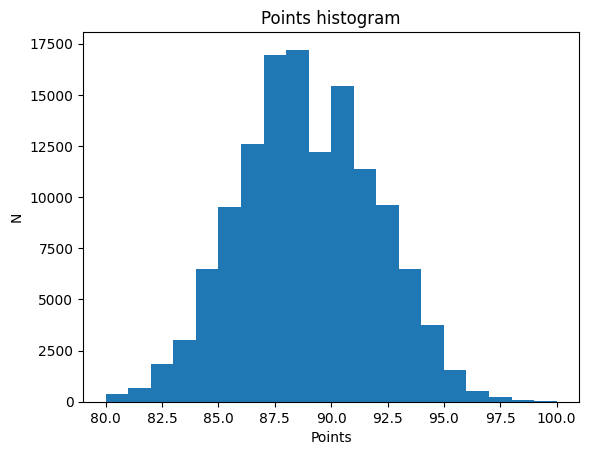

In [57]:
plt.hist(df.points, bins = 20)
plt.title("Points histogram")
plt.ylabel("N")
plt.xlabel("Points")
plt.show()

In [58]:
df['label'] = (df.points >= 90).astype(int)
df = df[['description', 'label']]

In [59]:
train, val, test = np.split(df.sample(frac=1), [int(0.8*len(df)), int(0.9*len(df))])

In [60]:
len(train), len(val), len(test)

(103976, 12997, 12998)

In [61]:
def df_to_dataset(dataframe, shuffle=True, batch_size = 1024):
  df = dataframe.copy()
  labels = df.pop('label')
  df = df['description']
  ds = tf.data.Dataset.from_tensor_slices((df, labels))
  if shuffle:
    ds = ds.shuffle(buffer_size = len(dataframe))
  ds = ds.batch(batch_size)
  ds = ds.prefetch(tf.data.AUTOTUNE)
  return ds

In [62]:
train_data = df_to_dataset(train)
valid_data = df_to_dataset(val)
test_data = df_to_dataset(test)

### Embedding + Model

In [72]:
embedding = 'https://tfhub.dev/google/nnlm-en-dim50/2'
hub_layer = hub.KerasLayer(embedding, dtype = tf.string, trainable=True)

In [73]:
hub_layer(list(train_data)[0][0])

<tf.Tensor: shape=(1024, 50), dtype=float32, numpy=
array([[ 0.2423979 , -0.19639494,  0.07900713, ..., -0.14905053,
        -0.26877585, -0.18797185],
       [ 0.31122884, -0.17253444, -0.07711536, ..., -0.06096882,
        -0.14332165,  0.03576304],
       [ 0.48892584, -0.16037734, -0.05653781, ...,  0.02692649,
        -0.34820834,  0.1891956 ],
       ...,
       [ 0.5306165 , -0.22163165, -0.03382602, ..., -0.07113175,
        -0.3511094 , -0.02119765],
       [ 0.47302935, -0.30080944, -0.13022086, ..., -0.14573066,
        -0.03186371,  0.0134447 ],
       [ 0.41992062, -0.12527193,  0.31089872, ..., -0.01109339,
         0.07059363,  0.0232157 ]], dtype=float32)>

In [74]:
model = keras.Sequential()
model.add(hub_layer)
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(16, activation='relu'))
model.add(layers.Dropout(0.4))
model.add(layers.Dense(1, activation='sigmoid'))


In [75]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              loss = keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [76]:
model.evaluate(train_data)


102/102 [==============================] - 1s 11ms/step - loss: 0.7115 - accuracy: 0.4168


[0.7115281820297241, 0.4167500138282776]

In [77]:
model.evaluate(valid_data)

13/13 [==============================] - 0s 8ms/step - loss: 0.7124 - accuracy: 0.4149


[0.7123571634292603, 0.4149419069290161]

In [78]:
history = model.fit(train_data, epochs = 5, validation_data=valid_data)

Epoch 1/5
102/102 [==============================] - 20s 174ms/step - loss: 0.6319 - accuracy: 0.6312 - val_loss: 0.4996 - val_accuracy: 0.7753
Epoch 2/5
102/102 [==============================] - 12s 112ms/step - loss: 0.4733 - accuracy: 0.7800 - val_loss: 0.4018 - val_accuracy: 0.8160
Epoch 3/5
102/102 [==============================] - 10s 99ms/step - loss: 0.4006 - accuracy: 0.8258 - val_loss: 0.3808 - val_accuracy: 0.8257
Epoch 4/5
102/102 [==============================] - 7s 71ms/step - loss: 0.3665 - accuracy: 0.8453 - val_loss: 0.3729 - val_accuracy: 0.8298
Epoch 5/5
102/102 [==============================] - 7s 64ms/step - loss: 0.3429 - accuracy: 0.8575 - val_loss: 0.3733 - val_accuracy: 0.8303


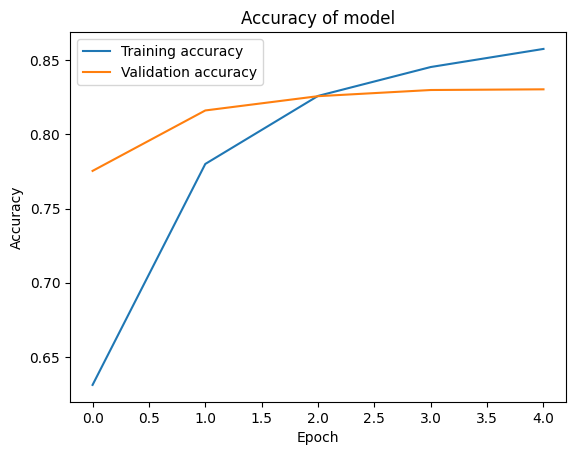

In [80]:
plt.plot(history.history['accuracy'], label = 'Training accuracy')
plt.plot(history.history['val_accuracy'], label = "Validation accuracy")
plt.title('Accuracy of model')
plt.ylabel("Accuracy")
plt.xlabel("Epoch")
plt.legend()
plt.show()

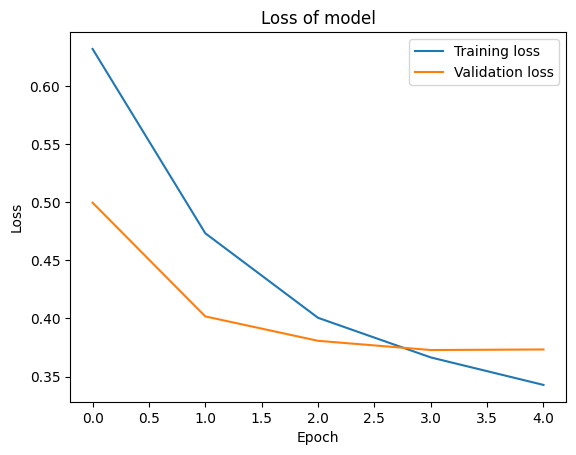

In [81]:
plt.plot(history.history['loss'], label = 'Training loss')
plt.plot(history.history['val_loss'], label = "Validation loss")
plt.title('Loss of model')
plt.ylabel("Loss")
plt.xlabel("Epoch")
plt.legend()
plt.show()

In [82]:
model.evaluate(test_data)

13/13 [==============================] - 0s 15ms/step - loss: 0.3773 - accuracy: 0.8302


[0.3773161470890045, 0.8302046656608582]

## LSTM

In [84]:
# first of all we will create an encoder for the test
encoder = layers.TextVectorization(max_tokens= 2000)
encoder.adapt(train_data.map(lambda text, label: text))

In [86]:
vocab = np.array(encoder.get_vocabulary())
vocab[:20]

array(['', '[UNK]', 'and', 'the', 'a', 'of', 'with', 'this', 'is', 'wine',
       'flavors', 'in', 'it', 'to', 'its', 'on', 'fruit', 'aromas',
       'palate', 'that'], dtype='<U17')

In [87]:
model = keras.Sequential([
    encoder,
    layers.Embedding(input_dim = len(encoder.get_vocabulary()),
                     output_dim = 32,
                     mask_zero = True),
    layers.LSTM(32),
    layers.Dense(32, activation='relu'),
    layers.Dropout(0.4),
    layers.Dense(1, activation='sigmoid')
])

In [88]:
model.compile(optimizer = keras.optimizers.Adam(learning_rate = 0.001),
              loss = keras.losses.BinaryCrossentropy(),
              metrics = ['accuracy'])

In [89]:
model.evaluate(train_data)
model.evaluate(valid_data)

13/13 [==============================] - 0s 18ms/step - loss: 0.6934 - accuracy: 0.4589


[0.6934314966201782, 0.4588751196861267]

In [90]:
history = model.fit(train_data, epochs=5, validation_data = valid_data)

Epoch 1/5
102/102 [==============================] - 19s 113ms/step - loss: 0.5460 - accuracy: 0.7118 - val_loss: 0.3793 - val_accuracy: 0.8277
Epoch 2/5
102/102 [==============================] - 5s 53ms/step - loss: 0.3724 - accuracy: 0.8340 - val_loss: 0.3537 - val_accuracy: 0.8397
Epoch 3/5
102/102 [==============================] - 6s 62ms/step - loss: 0.3500 - accuracy: 0.8452 - val_loss: 0.3450 - val_accuracy: 0.8428
Epoch 4/5
102/102 [==============================] - 4s 38ms/step - loss: 0.3430 - accuracy: 0.8492 - val_loss: 0.3565 - val_accuracy: 0.8334
Epoch 5/5
102/102 [==============================] - 4s 38ms/step - loss: 0.3399 - accuracy: 0.8497 - val_loss: 0.3439 - val_accuracy: 0.8429


In [91]:
model.evaluate(test_data)

13/13 [==============================] - 1s 43ms/step - loss: 0.3485 - accuracy: 0.8415


[0.3485116958618164, 0.8415140509605408]